In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
ukbuildings = gpd.read_file('ukb_edition_16_new_format.gpkg')
ukbuildings

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,bungalow,flat_conversion,height,premise_area,building_area,...,verisk_building_id,uprn,uprn_count,uprn_distance,toid,map_age,map_floors,map_use,map_simple_use,geometry
0,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,6.1,491.600006,491.600006,...,36372505,NaN,0,NaN,None,Unknown date,None,Commercial - mixed use,Non Residential,"POLYGON ((340472.9 370465.56, 340440.65 370466..."
1,Post 1999,2006.0,Residential,Detached,2,Not a bungalow,0.0,9.1,165.000000,165.000000,...,35697013,1.001184e+10,1,0.0,osgb1000002755044258,Post 1999,2,Residential,Residential,"POLYGON ((349493.893 311844.593, 349510.767 31..."
2,1837-1869,NaN,Residential,Mid-terrace,2,Not a bungalow,0.0,8.6,32.000000,318.299988,...,35701170,1.000700e+11,1,0.0,osgb1000035559718,1837-1869,2,Residential,Residential,"POLYGON ((349962.331 313426.576, 349959.632 31..."
3,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,9.3,94.400002,94.400002,...,39495304,NaN,0,NaN,None,Unknown date,None,Commercial - mixed use,Non Residential,"POLYGON ((344445.81 394162.7, 344452.92 394162..."
4,1919-1944,NaN,Residential,Detached,2,Not a bungalow,0.0,8.3,150.899994,150.899994,...,35671318,2.000001e+11,1,0.0,osgb1000035480205,1919-1944,2,Residential,Residential,"POLYGON ((346523.12 307069.06, 346523.18 30705..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24797250,1960-1979,NaN,Residential,Detached,2,Not a bungalow,0.0,6.5,122.000000,122.000000,...,36334052,1.000100e+11,1,0.0,osgb1000035015035,1960-1979,2,Residential,Residential,"POLYGON ((336286.47 361000.7, 336298.13 360992..."
24797251,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,3.1,28.799999,28.799999,...,35690433,NaN,0,NaN,None,Unknown date,None,Commercial - mixed use,Non Residential,"POLYGON ((340956.04 324640.56, 340959.88 32464..."
24797252,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,4.2,75.599998,75.599998,...,35709694,1.001314e+10,1,0.0,osgb5000005107453610,Unknown date,None,Commercial - mixed use,Non Residential,"POLYGON ((344829.64 320789.12, 344825.73 32078..."
24797253,Unknown date,NaN,Residential,Unknown,2,None,NaN,8.9,50.400002,50.400002,...,35689024,NaN,0,NaN,None,Unknown date,2,Residential,Residential,"POLYGON ((342633.96 321269.71, 342627.35 32127..."


In [3]:
sysc_boundary = gpd.read_file('Lower_Layer_Super_Output_Areas_Dec_2011_Boundaries_Full_Extent_BFE_EW_V3_2022_-2724249557619198582.gpkg')
sysc_boundary

,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
0,E01000034,Barking and Dagenham 003A,550689,186433,0.172296,51.556702,6006.847623,{2A20725D-7BAB-4A96-B09B-154EB16073A5},"MULTIPOLYGON (((550783.502 186822.004, 550815...."
1,E01000035,Barking and Dagenham 010A,549957,185575,0.161380,51.549099,3609.905134,{47EEF4C6-F44F-43C7-BA2F-BD8A4E62B5EE},"MULTIPOLYGON (((550266.91 185957.709, 550265.5..."
2,E01000036,Barking and Dagenham 010B,550645,185231,0.171148,51.545898,4393.928508,{57BF633A-6B2D-49F1-87FA-E64B1C2503B3},"MULTIPOLYGON (((549843.501 185417.14, 549841.2..."
3,E01000037,Barking and Dagenham 003B,551195,187087,0.179870,51.562401,2905.634678,{DE173B53-0B6E-4886-A4B6-3B59153CFCF3},"MULTIPOLYGON (((551550.056 187364.705, 551549...."
4,E01000038,Barking and Dagenham 003C,550700,187149,0.172761,51.563099,2305.558903,{16D8A8A9-39A1-40B8-A459-41B2F1FD0D04},"MULTIPOLYGON (((550920.362 187341.138, 550919...."
...,...,...,...,...,...,...,...,...,...
34748,W01001954,Cardiff 006F,312959,180574,-3.255820,51.517300,5567.813286,{26F1DB1F-F3BA-4611-A525-96FF8ADA4317},"MULTIPOLYGON (((312747.367 181262.1, 312733.18..."
34749,W01001955,Swansea 025F,265633,193182,-3.942370,51.621399,6037.602710,{F0EFA8B0-DA1A-400C-8E30-955EAAD51FA9},"MULTIPOLYGON (((265804.688 194161.261, 265802...."
34750,W01001956,Swansea 023E,260586,192621,-4.015000,51.615101,13127.898240,{5FADFD13-9162-4868-966A-09B98A2088D4},"MULTIPOLYGON (((259961 194979.5, 259951 194955..."
34751,W01001957,Swansea 025G,265337,192555,-3.946400,51.615700,2829.597133,{A115BA99-52A2-4FCE-AC50-26EE5B3D4D6C},"MULTIPOLYGON (((265154 192746, 265153.625 1927..."


<Axes: >

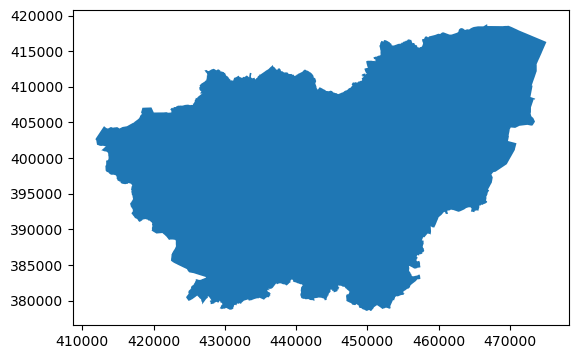

In [13]:
sysc_boundary = sysc_boundary[sysc_boundary.LSOA11NM.str.contains('Sheffield|Doncaster|Rotherham|Barnsley')].dissolve()
sysc_boundary.plot()

In [48]:
# sysc_buildings = ukbuildings.sjoin(sysc_boundary)
sysc_buildings=gpd.read_file('syscb_edition_16.gpkg')
sysc_buildings

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,bungalow,flat_conversion,height,premise_area,building_area,...,index_right,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
0,Unknown date,NaN,Agricultural,None,None,None,NaN,6.3,91.099998,91.099998,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((423877.75 390476.13, 423871.68 39047..."
1,1990-1999,1997.0,Agricultural,None,None,None,NaN,16.1,316.100006,316.100006,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((425936.45 397926.76, 425907.89 39794..."
2,Post 1999,2003.0,Residential,Detached,2,Not a bungalow,0.0,8.3,281.700012,281.700012,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((428393.69 396465.65, 428421.17 39645..."
3,Unknown date,NaN,Agricultural,None,None,None,NaN,4.4,34.099998,34.099998,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((431902.07 397176.14, 431905.52 39717..."
4,1990-1999,1997.0,Residential,Detached,2,Not a bungalow,0.0,7.9,95.599998,95.599998,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((430882.48 399365.53, 430883.32 39937..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690002,1870-1918,NaN,Residential,Semi-detached,2,Not a bungalow,0.0,8.4,96.300003,96.300003,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((453544.99 410412.86, 453559.49 41041..."
690003,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,3.3,220.699997,220.699997,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((458445.167 401703.144, 458457.903 40..."
690004,1919-1944,NaN,Residential,Detached,2,Not a bungalow,0.0,9.6,77.500000,77.500000,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((457052.178 402045.681, 457056.761 40..."
690005,1960-1979,NaN,Residential,Detached,2,Not a bungalow,0.0,8.5,104.699997,104.699997,...,0,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((461289.882 400867.599, 461295.666 40..."


In [19]:
sysc_buildings.to_file('syscb_edition_16.gpkg')

In [49]:
sysc_buildings['Area']=sysc_buildings.area
sysc_buildings

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,bungalow,flat_conversion,height,premise_area,building_area,...,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry,Area
0,Unknown date,NaN,Agricultural,None,None,None,NaN,6.3,91.099998,91.099998,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((423877.75 390476.13, 423871.68 39047...",91.059600
1,1990-1999,1997.0,Agricultural,None,None,None,NaN,16.1,316.100006,316.100006,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((425936.45 397926.76, 425907.89 39794...",316.074400
2,Post 1999,2003.0,Residential,Detached,2,Not a bungalow,0.0,8.3,281.700012,281.700012,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((428393.69 396465.65, 428421.17 39645...",281.659100
3,Unknown date,NaN,Agricultural,None,None,None,NaN,4.4,34.099998,34.099998,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((431902.07 397176.14, 431905.52 39717...",34.138700
4,1990-1999,1997.0,Residential,Detached,2,Not a bungalow,0.0,7.9,95.599998,95.599998,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((430882.48 399365.53, 430883.32 39937...",95.558750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690002,1870-1918,NaN,Residential,Semi-detached,2,Not a bungalow,0.0,8.4,96.300003,96.300003,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((453544.99 410412.86, 453559.49 41041...",96.305000
690003,Unknown date,NaN,Commercial - mixed use,None,None,None,NaN,3.3,220.699997,220.699997,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((458445.167 401703.144, 458457.903 40...",220.678903
690004,1919-1944,NaN,Residential,Detached,2,Not a bungalow,0.0,9.6,77.500000,77.500000,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((457052.178 402045.681, 457056.761 40...",77.545474
690005,1960-1979,NaN,Residential,Detached,2,Not a bungalow,0.0,8.5,104.699997,104.699997,...,E01007733,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((461289.882 400867.599, 461295.666 40...",104.725704


In [50]:
sysc_buildings_resi=sysc_buildings.loc[(sysc_buildings.premise_use=='Residential')&
                                       (sysc_buildings.premise_type!='Domestic outbuilding')].copy()
sysc_buildings_resi['premise_floor_count']=pd.to_numeric(sysc_buildings_resi['premise_floor_count'])
sysc_buildings_resi['treated_floor_area']=sysc_buildings_resi['premise_floor_count']*sysc_buildings_resi['Area'] 
sysc_buildings_resi

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,bungalow,flat_conversion,height,premise_area,building_area,...,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry,Area,treated_floor_area
2,Post 1999,2003.0,Residential,Detached,2.0,Not a bungalow,0.0,8.3,281.700012,281.700012,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((428393.69 396465.65, 428421.17 39645...",281.659100,563.318200
4,1990-1999,1997.0,Residential,Detached,2.0,Not a bungalow,0.0,7.9,95.599998,95.599998,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((430882.48 399365.53, 430883.32 39937...",95.558750,191.117500
5,Post 1999,2000.0,Residential,Detached,2.0,Not a bungalow,0.0,8.9,120.300003,120.300003,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((439085.97 395293.27, 439090.58 39527...",120.253200,240.506400
6,1990-1999,1997.0,Residential,Semi-detached,2.0,Not a bungalow,0.0,7.8,98.300003,98.300003,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((449487.43 384072.44, 449498.76 38407...",98.256650,196.513300
8,1960-1979,NaN,Residential,Detached,1.0,Bungalow (high confidence),0.0,9.7,65.400002,65.400002,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((447882.41 383080.9, 447881.11 383074...",65.380400,65.380400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690000,1919-1944,NaN,Residential,Semi-detached,2.0,Not a bungalow,0.0,8.0,78.199997,78.199997,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((453522.48 410663.94, 453526.38 41065...",78.230100,156.460200
690001,1960-1979,NaN,Residential,Detached,1.0,Bungalow (high confidence),0.0,5.0,229.800003,229.800003,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((452622.44 410802.57, 452625.33 41077...",229.832100,229.832100
690002,1870-1918,NaN,Residential,Semi-detached,2.0,Not a bungalow,0.0,8.4,96.300003,96.300003,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((453544.99 410412.86, 453559.49 41041...",96.305000,192.610000
690004,1919-1944,NaN,Residential,Detached,2.0,Not a bungalow,0.0,9.6,77.500000,77.500000,...,Rotherham 009F,441082,395411,-1.38282,53.453899,2858.226321,{C72CF2B8-7A7D-4AA5-8077-12B9E5E03124},"POLYGON ((457052.178 402045.681, 457056.761 40...",77.545474,155.090947


In [51]:
sysc_buildings['premise_archetype_3']=''

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Detached')&
                        (sysc_buildings_resi.treated_floor_area<=150), 'premise_archetype_3']='DT-R'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.height<=7.5)&
                        (sysc_buildings_resi.premise_type=='Detached')&
                        (sysc_buildings_resi.treated_floor_area>150), 'premise_archetype_3']='DT-L'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.height>7.5)&
                        (sysc_buildings_resi.premise_type=='Detached')&
                        (sysc_buildings_resi.treated_floor_area>150), 'premise_archetype_3']='DT-V'
#############################
sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Semi-detached')&
                        (sysc_buildings_resi.treated_floor_area<=100), 'premise_archetype_3']='SD-R'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Semi-detached')&
                        (sysc_buildings_resi.treated_floor_area>100)&(sysc_buildings_resi.treated_floor_area<=150), 'premise_archetype_3']='SD-S'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Semi-detached')&
                        (sysc_buildings_resi.treated_floor_area>150), 'premise_archetype_3']='SD-V'
#############################
sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='End-terrace')|(sysc_buildings_resi.premise_type=='Enclosed end-terrace'))&
                        (sysc_buildings_resi.treated_floor_area<=110), 'premise_archetype_3']='T-RE'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='End-terrace')|(sysc_buildings_resi.premise_type=='Enclosed end-terrace'))&
                        (sysc_buildings_resi.treated_floor_area>110)&(sysc_buildings_resi.treated_floor_area<=200), 'premise_archetype_3']='T-VE'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='End-terrace')|(sysc_buildings_resi.premise_type=='Enclosed end-terrace'))&
                        (sysc_buildings_resi.treated_floor_area>200), 'premise_archetype_3']='T-GE'
#############################
sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='Mid-terrace')|(sysc_buildings_resi.premise_type=='Enclosed mid-terrace'))&
                        (sysc_buildings_resi.treated_floor_area<=110), 'premise_archetype_3']='T-RM'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='Mid-terrace')|(sysc_buildings_resi.premise_type=='Enclosed mid-terrace'))&
                        (sysc_buildings_resi.treated_floor_area>110)&(sysc_buildings_resi.treated_floor_area<=200), 'premise_archetype_3']='T-VM'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        ((sysc_buildings_resi.premise_type=='Mid-terrace')|(sysc_buildings_resi.premise_type=='Enclosed mid-terrace'))&
                        (sysc_buildings_resi.treated_floor_area>200), 'premise_archetype_3']='T-GM'
#############################
sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Terrace')&
                        (sysc_buildings_resi.treated_floor_area<=110), 'premise_archetype_3']='T-RM'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Terrace')&
                        (sysc_buildings_resi.treated_floor_area>110)&(sysc_buildings_resi.treated_floor_area<=200), 'premise_archetype_3']='T-VM'

sysc_buildings_resi.loc[(sysc_buildings_resi.premise_floor_count>=2)&
                        (sysc_buildings_resi.premise_type=='Terrace')&
                        (sysc_buildings_resi.treated_floor_area>200), 'premise_archetype_3']='T-GM'
#############################
sysc_buildings_resi.loc[(sysc_buildings_resi.bungalow=='Bungalow (high confidence)')&
                        (sysc_buildings_resi.premise_type=='Detached'), 'premise_archetype_3']='B-DT'

sysc_buildings_resi.loc[(sysc_buildings_resi.bungalow=='Bungalow (high confidence)')&
                        (sysc_buildings_resi.premise_type=='Semi-detached'), 'premise_archetype_3']='B-SD'

C:\Users\ci1hax\AppData\Local\Temp\ipykernel_29216\3780954742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sysc_buildings_resi.groupby('premise_archetype_3').mean()['treated_floor_area'].plot(kind='bar')


<Axes: xlabel='premise_archetype_3'>

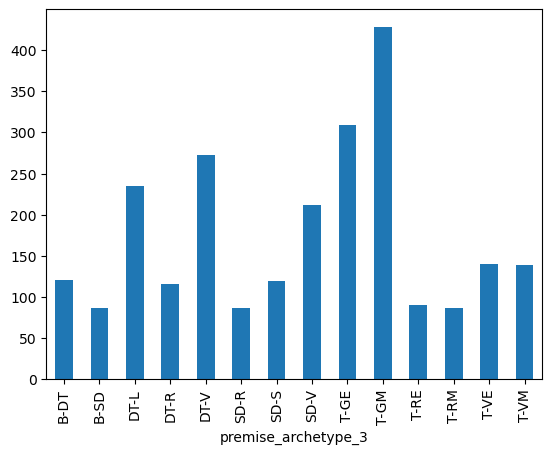

In [52]:
sysc_buildings_resi.groupby('premise_archetype_3').mean()['treated_floor_area'].plot(kind='bar')

C:\Users\ci1hax\AppData\Local\Temp\ipykernel_31252\3780954742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sysc_buildings_resi.groupby('premise_archetype_3').mean()['treated_floor_area'].plot(kind='bar')


<Axes: xlabel='premise_archetype_3'>

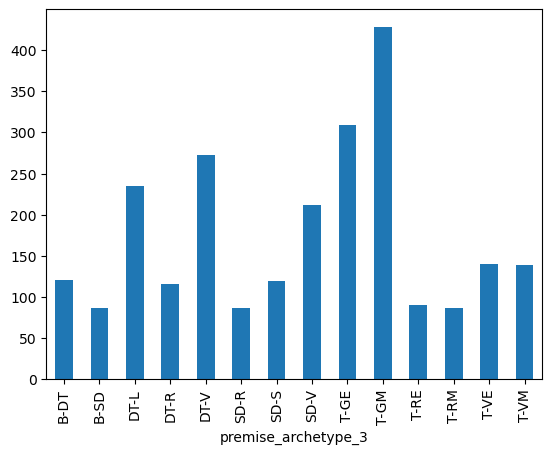

In [7]:
sysc_buildings_resi.groupby('premise_archetype_3').mean()['treated_floor_area'].plot(kind='bar')

In [7]:
sysc_buildings_resi.groupby('premise_archetype_3')['treated_floor_area'].count()

premise_archetype_3
B-DT     15264
B-SD     11560
DT-L     17757
DT-R     27404
DT-V     48719
SD-R     60750
SD-S    110201
SD-V     45240
T-GE      1728
T-GM      9387
T-RE     16643
T-RM     61042
T-VE     15807
T-VM     36881
Name: treated_floor_area, dtype: int64

In [53]:
archetype_data = pd.read_csv(r'G:\Shared drives\Workstation-R\1-research\script-command\sysc-retrofit\archtype\Archetype_headlines.csv', header='infer')

archetype_data.columns=['Archetype', 'Annual Operational Carbon, Existing [kgCO2e/m2]', 
                   'Annual Operational Carbon, System Retrofit [kgCO2e/m2]', 'Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]', 'Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]',
                   'Average Embodied Carbon, System Retrofit [kgCO2e/m2]', 'Average Embodied Carbon, Fabric Retrofit [kgCO2e/m2]', 'Average Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]',
                   'Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]', 'Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]', 'Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]', 'Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]',
                   'Annual Carbon Savings, System Retrofit [kgCO2e/m2]', 'Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]', 'Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]',
                   'Embodied Carbon Payback, System Retrofit [years]', 'Embodied Carbon Payback, Fabric Retrofit [years]', 'Embodied Carbon Payback, Whole-house Retrofit [years]']

archetype_data


,Archetype,"Annual Operational Carbon, Existing [kgCO2e/m2]","Annual Operational Carbon, System Retrofit [kgCO2e/m2]","Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]","Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]","Average Embodied Carbon, System Retrofit [kgCO2e/m2]","Average Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Average Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Annual Carbon Savings, System Retrofit [kgCO2e/m2]","Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]","Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]","Embodied Carbon Payback, System Retrofit [years]","Embodied Carbon Payback, Fabric Retrofit [years]","Embodied Carbon Payback, Whole-house Retrofit [years]"
0,SD-V,23.944,8.055,2.822,2.405,2.116065,40.997935,43.114,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
1,SD-R,22.710,7.723,3.627,2.569,5.737472,40.684528,46.422,22.499562,235.680562,28.237,241.42,14.987,19.083,20.141,0.4,2.1,2.3
2,SD-S,21.407,7.164,3.730,2.596,4.141444,44.828556,48.970,25.300071,266.328376,29.441,270.47,14.243,17.677,18.811,0.3,2.5,2.6
3,B-SD,20.814,7.116,4.694,3.473,5.350775,45.291225,50.642,25.388504,277.824205,30.739,283.17,13.698,16.120,17.341,0.4,2.8,2.9
4,B-DT,21.448,7.194,3.842,2.944,2.800956,43.292044,46.093,24.541848,290.140111,27.343,292.94,14.254,17.606,18.504,0.2,2.5,2.5
5,DT-V,20.185,6.714,3.200,1.987,1.287051,34.038949,35.326,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
6,DT-R,21.097,7.162,2.378,2.505,3.425833,40.165167,43.591,22.381850,250.760206,25.808,254.19,13.935,18.719,18.592,0.2,2.1,2.3
7,DT-L,20.190,6.796,3.305,2.447,1.396117,34.636883,36.033,19.203695,226.305109,20.600,227.70,13.394,16.885,17.743,0.1,2.1,2.0
8,T-GM,18.130,6.139,2.112,2.285,1.659579,26.537421,28.197,14.385169,134.746076,16.044,136.41,11.991,16.018,15.845,0.1,1.7,1.8
9,T-GE,22.826,7.654,2.677,2.350,1.659481,32.112519,33.772,17.559779,178.889704,19.219,180.55,15.172,20.149,20.476,0.1,1.6,1.6


In [54]:
sysc_buildings_resi=sysc_buildings_resi.merge(archetype_data, left_on='premise_archetype_3', right_on='Archetype', how='left')
sysc_buildings_resi

,premise_age,premise_year,premise_use,premise_type,premise_floor_count,bungalow,flat_conversion,height,premise_area,building_area,...,"Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Annual Carbon Savings, System Retrofit [kgCO2e/m2]","Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]","Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]","Embodied Carbon Payback, System Retrofit [years]","Embodied Carbon Payback, Fabric Retrofit [years]","Embodied Carbon Payback, Whole-house Retrofit [years]"
0,Post 1999,2003.0,Residential,Detached,2.0,Not a bungalow,0.0,8.3,281.700012,281.700012,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
1,1990-1999,1997.0,Residential,Detached,2.0,Not a bungalow,0.0,7.9,95.599998,95.599998,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
2,Post 1999,2000.0,Residential,Detached,2.0,Not a bungalow,0.0,8.9,120.300003,120.300003,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
3,1990-1999,1997.0,Residential,Semi-detached,2.0,Not a bungalow,0.0,7.8,98.300003,98.300003,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
4,1960-1979,NaN,Residential,Detached,1.0,Bungalow (high confidence),0.0,9.7,65.400002,65.400002,...,24.541848,290.140111,27.343,292.94,14.254,17.606,18.504,0.2,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501665,1919-1944,NaN,Residential,Semi-detached,2.0,Not a bungalow,0.0,8.0,78.199997,78.199997,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
501666,1960-1979,NaN,Residential,Detached,1.0,Bungalow (high confidence),0.0,5.0,229.800003,229.800003,...,24.541848,290.140111,27.343,292.94,14.254,17.606,18.504,0.2,2.5,2.5
501667,1870-1918,NaN,Residential,Semi-detached,2.0,Not a bungalow,0.0,8.4,96.300003,96.300003,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
501668,1919-1944,NaN,Residential,Detached,2.0,Not a bungalow,0.0,9.6,77.500000,77.500000,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9


In [55]:
sysc_buildings_resi=sysc_buildings_resi.drop(['premise_age', 'premise_year', 'premise_use', 'premise_type',
       'premise_floor_count', 'bungalow', 'flat_conversion', 'height',
       'premise_area', 'building_area', 'address_area', 'gross_area',
       'basement', 'listed_grade', 'element_count', 'bathroom_count',
       'bedroom_count', 'reception_room_count', 'roof_type', 'wall_type',
       'substructure_type', 'glazing_type', 'wall_construction_type',
       'extension_count', 'habitable_rooms', 'open_fireplaces', 'floor_type',
       'distance_building', 'site_id', 'site_area', 'site_non_built_area',
       'site_building_count', 'distance_water', 'verisk_premise_id',
       'verisk_building_id', 'uprn_count', 'uprn_distance', 'map_age', 'map_floors', 'map_use', 'map_simple_use',  'index_right', 'LSOA11CD', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG_', 'LAT',
       'Shape_Leng', 'GlobalID', 'Area',
       'premise_archetype_3'], axis=1)

sysc_buildings_resi

,uprn,toid,geometry,treated_floor_area,Archetype,"Annual Operational Carbon, Existing [kgCO2e/m2]","Annual Operational Carbon, System Retrofit [kgCO2e/m2]","Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]","Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]","Average Embodied Carbon, System Retrofit [kgCO2e/m2]",...,"Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]","Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]","Annual Carbon Savings, System Retrofit [kgCO2e/m2]","Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]","Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]","Embodied Carbon Payback, System Retrofit [years]","Embodied Carbon Payback, Fabric Retrofit [years]","Embodied Carbon Payback, Whole-house Retrofit [years]"
0,2.000030e+11,osgb1000002492288378,"POLYGON ((428393.69 396465.65, 428421.17 39645...",563.318200,DT-V,20.185,6.714,3.200,1.987,1.287051,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
1,1.003278e+10,osgb1000025658046,"POLYGON ((430882.48 399365.53, 430883.32 39937...",191.117500,DT-V,20.185,6.714,3.200,1.987,1.287051,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
2,2.000006e+11,osgb1000026286770,"POLYGON ((439085.97 395293.27, 439090.58 39527...",240.506400,DT-V,20.185,6.714,3.200,1.987,1.287051,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9
3,1.000509e+11,osgb1000022523336,"POLYGON ((449487.43 384072.44, 449498.76 38407...",196.513300,SD-V,23.944,8.055,2.822,2.405,2.116065,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
4,1.000509e+11,osgb1000022418547,"POLYGON ((447882.41 383080.9, 447881.11 383074...",65.380400,B-DT,21.448,7.194,3.842,2.944,2.800956,...,24.541848,290.140111,27.343,292.94,14.254,17.606,18.504,0.2,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501665,1.000507e+11,osgb1000033365745,"POLYGON ((453522.48 410663.94, 453526.38 41065...",156.460200,SD-V,23.944,8.055,2.822,2.405,2.116065,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
501666,1.000507e+11,osgb1000033352501,"POLYGON ((452622.44 410802.57, 452625.33 41077...",229.832100,B-DT,21.448,7.194,3.842,2.944,2.800956,...,24.541848,290.140111,27.343,292.94,14.254,17.606,18.504,0.2,2.5,2.5
501667,1.000507e+11,osgb1000033365400,"POLYGON ((453544.99 410412.86, 453559.49 41041...",192.610000,SD-V,23.944,8.055,2.822,2.405,2.116065,...,22.674149,230.102870,24.791,232.22,15.889,21.122,21.539,0.1,1.9,2.0
501668,1.000507e+11,osgb1000033447660,"POLYGON ((457052.178 402045.681, 457056.761 40...",155.090947,DT-V,20.185,6.714,3.200,1.987,1.287051,...,18.973966,212.063343,20.261,213.35,13.471,16.985,18.198,0.1,2.0,1.9


In [58]:
for i in range(5,19):
    sysc_buildings_resi[22+i]=sysc_buildings_resi.iloc[:,i]*sysc_buildings_resi.iloc[:,3]/1000

sysc_buildings_resi.columns=[                                 'uprn',
                                                              'toid',
                                                          'geometry',
                                                'treated_floor_area',
                                                         'Archetype',
                   'Annual Operational Carbon, Existing [kgCO2e/m2]',
            'Annual Operational Carbon, System Retrofit [kgCO2e/m2]',
            'Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]',
       'Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]',
              'Average Embodied Carbon, System Retrofit [kgCO2e/m2]',
              'Average Embodied Carbon, Fabric Retrofit [kgCO2e/m2]',
         'Average Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]',
                  'Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]',
                  'Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]',
             'Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]',
             'Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]',
                'Annual Carbon Savings, System Retrofit [kgCO2e/m2]',
                'Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]',
           'Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]',
                  'Embodied Carbon Payback, System Retrofit [years]',
                  'Embodied Carbon Payback, Fabric Retrofit [years]',
             'Embodied Carbon Payback, Whole-house Retrofit [years]',
                      'Annual Operational Carbon, Existing [tCO2e]',
               'Annual Operational Carbon, System Retrofit [tCO2e]',
               'Annual Operational Carbon, Fabric Retrofit [tCO2e]',
          'Annual Operational Carbon, Whole-house Retrofit [tCO2e]',
                 'Average Embodied Carbon, System Retrofit [tCO2e]',
                 'Average Embodied Carbon, Fabric Retrofit [tCO2e]',
            'Average Embodied Carbon, Whole-house Retrofit [tCO2e]',
                     'Min Embodied Carbon, Fabric Retrofit [tCO2e]',
                     'Max Embodied Carbon, Fabric Retrofit [tCO2e]',
                'Min Embodied Carbon, Whole-house Retrofit [tCO2e]',
                'Max Embodied Carbon, Whole-house Retrofit [tCO2e]',
                   'Annual Carbon Savings, System Retrofit [tCO2e]',
                   'Annual Carbon Savings, Fabric Retrofit [tCO2e]',
              'Annual Carbon Savings, Whole-house Retrofit [tCO2e]',
             ]

sysc_buildings_resi

,uprn,toid,geometry,treated_floor_area,Archetype,"Annual Operational Carbon, Existing [kgCO2e/m2]","Annual Operational Carbon, System Retrofit [kgCO2e/m2]","Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]","Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]","Average Embodied Carbon, System Retrofit [kgCO2e/m2]",...,"Average Embodied Carbon, System Retrofit [tCO2e]","Average Embodied Carbon, Fabric Retrofit [tCO2e]","Average Embodied Carbon, Whole-house Retrofit [tCO2e]","Min Embodied Carbon, Fabric Retrofit [tCO2e]","Max Embodied Carbon, Fabric Retrofit [tCO2e]","Min Embodied Carbon, Whole-house Retrofit [tCO2e]","Max Embodied Carbon, Whole-house Retrofit [tCO2e]","Annual Carbon Savings, System Retrofit [tCO2e]","Annual Carbon Savings, Fabric Retrofit [tCO2e]","Annual Carbon Savings, Whole-house Retrofit [tCO2e]"
0,2.000030e+11,osgb1000002492288378,"POLYGON ((428393.69 396465.65, 428421.17 39645...",563.318200,DT-V,20.185,6.714,3.200,1.987,1.287051,...,0.725020,19.174759,19.899779,10.688380,119.459141,11.413390,120.183938,7.588459,9.567960,10.251265
1,1.003278e+10,osgb1000025658046,"POLYGON ((430882.48 399365.53, 430883.32 39937...",191.117500,DT-V,20.185,6.714,3.200,1.987,1.287051,...,0.245978,6.505439,6.751417,3.626257,40.529016,3.872232,40.774919,2.574544,3.246131,3.477956
2,2.000006e+11,osgb1000026286770,"POLYGON ((439085.97 395293.27, 439090.58 39527...",240.506400,DT-V,20.185,6.714,3.200,1.987,1.287051,...,0.309544,8.186585,8.496129,4.563360,51.002591,4.872900,51.312040,3.239862,4.085001,4.376735
3,1.000509e+11,osgb1000022523336,"POLYGON ((449487.43 384072.44, 449498.76 38407...",196.513300,SD-V,23.944,8.055,2.822,2.405,2.116065,...,0.415835,8.056639,8.472474,4.455772,45.218274,4.871761,45.634319,3.122400,4.150754,4.232700
4,1.000509e+11,osgb1000022418547,"POLYGON ((447882.41 383080.9, 447881.11 383074...",65.380400,B-DT,21.448,7.194,3.842,2.944,2.800956,...,0.183128,2.830451,3.013579,1.604556,18.969477,1.787696,19.152534,0.931932,1.151087,1.209799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501665,1.000507e+11,osgb1000033365745,"POLYGON ((453522.48 410663.94, 453526.38 41065...",156.460200,SD-V,23.944,8.055,2.822,2.405,2.116065,...,0.331080,6.414545,6.745625,3.547602,36.001941,3.878805,36.333188,2.485996,3.304752,3.369996
501666,1.000507e+11,osgb1000033352501,"POLYGON ((452622.44 410802.57, 452625.33 41077...",229.832100,B-DT,21.448,7.194,3.842,2.944,2.800956,...,0.643750,9.949901,10.593651,5.640505,66.683511,6.284299,67.327015,3.276027,4.046424,4.252813
501667,1.000507e+11,osgb1000033365400,"POLYGON ((453544.99 410412.86, 453559.49 41041...",192.610000,SD-V,23.944,8.055,2.822,2.405,2.116065,...,0.407575,7.896612,8.304188,4.367268,44.320114,4.774995,44.727894,3.060380,4.068308,4.148627
501668,1.000507e+11,osgb1000033447660,"POLYGON ((457052.178 402045.681, 457056.761 40...",155.090947,DT-V,20.185,6.714,3.200,1.987,1.287051,...,0.199610,5.279133,5.478743,2.942690,32.889105,3.142298,33.088654,2.089230,2.634220,2.822345


<Axes: >

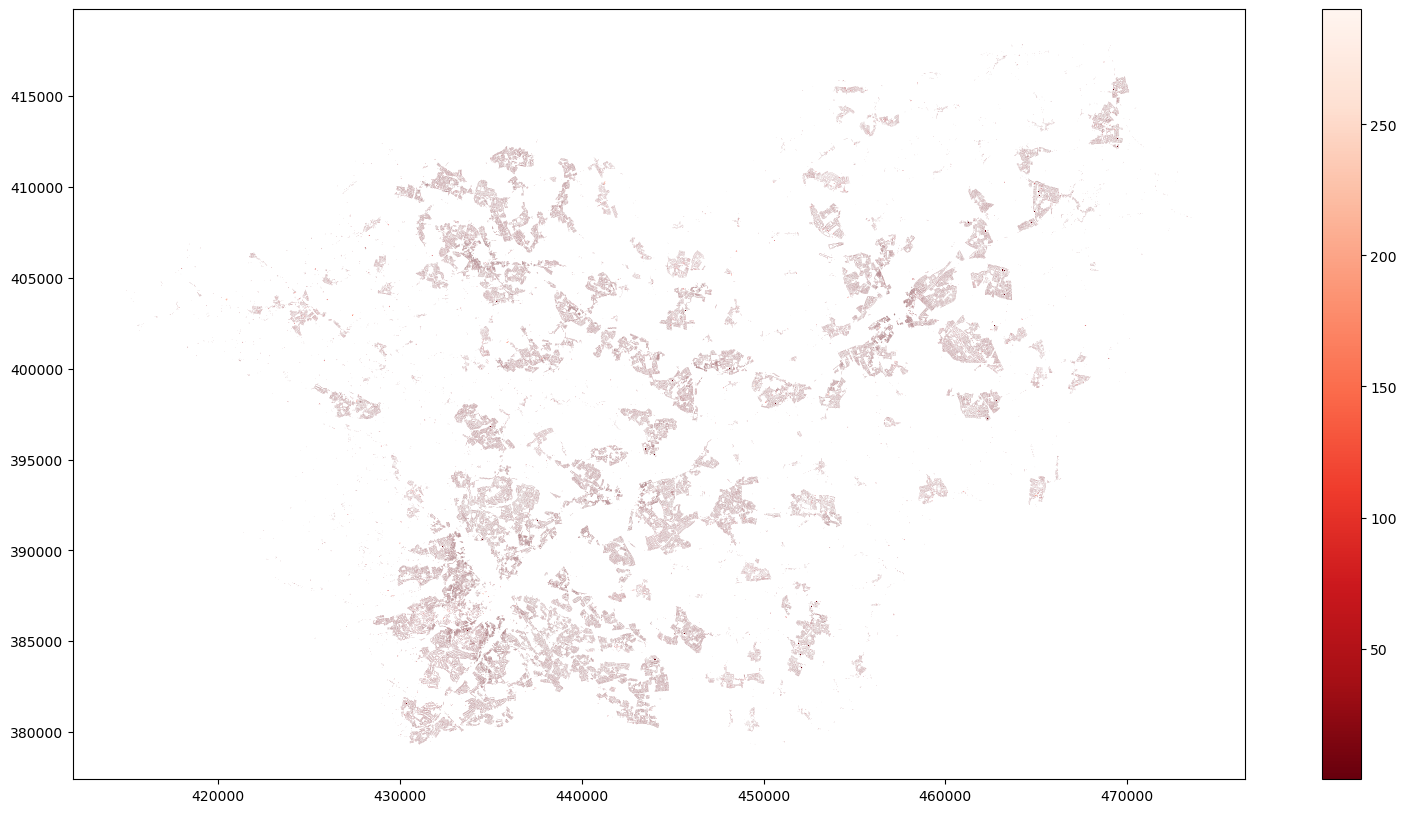

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

sysc_buildings_resi.plot('Annual Operational Carbon, Existing [tCO2e]', legend=True, cmap='Reds_r', ax=ax)

C:\Users\ci1hax\AppData\Local\Temp\ipykernel_29216\3215559362.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sysc_buildings_resi.groupby('Archetype').mean()['Annual Operational Carbon, Whole-house Retrofit [tCO2e]'].plot(kind='bar')


<Axes: xlabel='Archetype'>

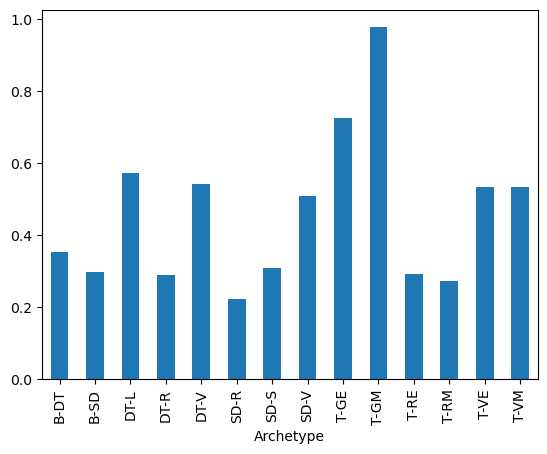

In [63]:
sysc_buildings_resi.groupby('Archetype').mean()['Annual Operational Carbon, Whole-house Retrofit [tCO2e]'].plot(kind='bar')

In [ ]:
sysc_buildings_resi.to_file('sysc_buildings_retrofit_inventory.gpkg')

: 

In [2]:
sysc_buildings_resi = gpd.read_file('sysc_buildings_retrofit_inventory.gpkg')
for i in sysc_buildings_resi.columns:
    display(i)

'uprn'

'toid'

'treated_floor_area'

'Archetype'

'Annual Operational Carbon, Existing [kgCO2e/m2]'

'Annual Operational Carbon, System Retrofit [kgCO2e/m2]'

'Annual Operational Carbon, Fabric Retrofit [kgCO2e/m2]'

'Annual Operational Carbon, Whole-house Retrofit [kgCO2e/m2]'

'Average Embodied Carbon, System Retrofit [kgCO2e/m2]'

'Average Embodied Carbon, Fabric Retrofit [kgCO2e/m2]'

'Average Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]'

'Min Embodied Carbon, Fabric Retrofit [kgCO2e/m2]'

'Max Embodied Carbon, Fabric Retrofit [kgCO2e/m2]'

'Min Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]'

'Max Embodied Carbon, Whole-house Retrofit [kgCO2e/m2]'

'Annual Carbon Savings, System Retrofit [kgCO2e/m2]'

'Annual Carbon Savings, Fabric Retrofit [kgCO2e/m2]'

'Annual Carbon Savings, Whole-house Retrofit [kgCO2e/m2]'

'Embodied Carbon Payback, System Retrofit [years]'

'Embodied Carbon Payback, Fabric Retrofit [years]'

'Embodied Carbon Payback, Whole-house Retrofit [years]'

'Annual Operational Carbon, Existing [tCO2e]'

'Annual Operational Carbon, System Retrofit [tCO2e]'

'Annual Operational Carbon, Fabric Retrofit [tCO2e]'

'Annual Operational Carbon, Whole-house Retrofit [tCO2e]'

'Average Embodied Carbon, System Retrofit [tCO2e]'

'Average Embodied Carbon, Fabric Retrofit [tCO2e]'

'Average Embodied Carbon, Whole-house Retrofit [tCO2e]'

'Min Embodied Carbon, Fabric Retrofit [tCO2e]'

'Max Embodied Carbon, Fabric Retrofit [tCO2e]'

'Min Embodied Carbon, Whole-house Retrofit [tCO2e]'

'Max Embodied Carbon, Whole-house Retrofit [tCO2e]'

'Annual Carbon Savings, System Retrofit [tCO2e]'

'Annual Carbon Savings, Fabric Retrofit [tCO2e]'

'Annual Carbon Savings, Whole-house Retrofit [tCO2e]'

'geometry'

In [4]:
sysc_buildings_resi.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [6]:
sysc_buildings_resi.Archetype.unique()

array(['DT-V', 'SD-V', 'B-DT', 'DT-R', 'SD-S', None, 'T-RE', 'SD-R',
       'T-GM', 'T-VE', 'T-VM', 'DT-L', 'B-SD', 'T-RM', 'T-GE'],
      dtype=object)